# Transfer Learning using CNNs
Convolutional Neural Networks (CNNs) have been used for several image classification tasks. They require a lot of data and time to train. However, sometimes the dataset may be limited and not enough to train a CNN from scratch. In such a scenerio it is helpful to use a *pre-trained CNN*, which has been trained on a large dataset. We will use VGG-19 pre-trained CNN, which is a 19-layer network trained on [Imagenet](http://www.image-net.org/). Details about VGG-19 model architecture are available [here](https://arxiv.org/abs/1409.1556). Other pre-trained models in Keras are available [here](https://keras.io/applications/#documentation-for-individual-models).

In this notebook, we will learn to use a pre-trained model for:


* **Image Classification:** 
If the new dataset has the same classes as the training dataset, then the pre-trained CNN can be used directly to predict the class of the images from the new dataset.

* **Feature Extraction:**
CNNs can also be used as a feature extractor instead of a classifier. The last layer of the CNN can be removed and an image can be passed through the rest of the network to obtain its feature vector. For example, in VGG-19 model the last layer (1000-dimensional) can be removed and the fully connected layer (fc2) results in a 4096-dimesnional feature vector representation of an input image. After extracting features from all the training images, a classfier like SVM or logistic regression can be trained for image classification.

Another way of using pre-trained CNNs for transfer learning is to fine-tune CNNs by initializing network weights from a pre-trained network and then re-training the network with the new dataset. Fine-tuning CNNs will be covered in next tutorial. 

## Import necessary modules

In [ ]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=gpu,floatX=float32"

In [1]:
# import necessary modules
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import cv2
import h5py

Using TensorFlow backend.


## Pre-trained model for image classification

In [44]:
# load pre-trained model
model = VGG19(weights='imagenet', include_top=True)
# display model layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

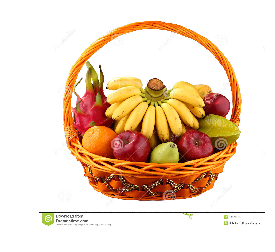

In [45]:
# display the image
img_disp = cv2.imread('buck.jpg')
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
plt.imshow(img_disp)
plt.axis("off")  
plt.show()

In [46]:
# pre-process the image
img = image.load_img('buck.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
# predict the output 
preds = model.predict(img)
# decode the prediction
pred_class = decode_predictions(preds, top=3)[0][0]
print ("Predicted Class: %s"%pred_class[1])
print ("Confidance: %s"%pred_class[2])

Predicted Class: shopping_basket
Confidance: 0.581442


## Pre-trained model as a feature extractor

In [35]:
# load pre-trained model
base_model = VGG19(weights='imagenet')

In [36]:
# pre-process the image
img = image.load_img('buck.jpg', target_size=(224, 224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img) 

In [37]:
# define model from base model for feature extraction from fc2 layer
model = Model(input=base_model.input, output=base_model.get_layer('fc2').output)
# obtain the outpur of fc2 layer
fc2_features = model.predict(img)
print ("Feature vector dimensions: ",fc2_features.shape)

C:\Users\abhi\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  from ipykernel import kernelapp as app


Feature vector dimensions:  (1, 4096)
